In [161]:
# This configures the notebook to automatically reload code when it is changed in imporeted functions.
%reload_ext autoreload
%autoreload 2

# Import all we need
import numpy as np
from matplotlib import pyplot as plt

from utils import plotCase, loadDataSet, selectTrainingSamples, calcConfusionMatrix, calcAccuracy, plotResultDots, plotResultsOCR
from classifiers import kNN

plt.rcParams['figure.facecolor']='white'

In [180]:
## Select which data to use:

# 1 = dot cloud 1
# 2 = dot cloud 2
# 3 = dot cloud 3
# 4 = OCR data

dataSetNr = 4  # Change this to load new data

# X - Data samples
# D - Desired output from classifier for each sample
# L - Labels for each sample
X, D, L = loadDataSet(dataSetNr)

# You can plot and study dataset 1 to 3 by running:
if dataSetNr in [1,2,3]:
    plotCase(X,L)

In [181]:
# Select a subset of the training samples
numBins = 4                     # Number of bins you want to divide your data into
numSamplesPerLabelPerBin = np.inf  # Number of samples per label per bin, set to inf for max number (total number is numLabels*numSamplesPerBin)
selectAtRandom = True           # true = select samples at random, false = select the first features

# Split data into bins based on the settings above.
# The outputs are lists of length numBins, where each item is a data array. Try printing for example XBins[0].shape.
XBins, DBins, LBins = selectTrainingSamples(X, D, L, numSamplesPerLabelPerBin, numBins, selectAtRandom)

# To extract a single bin from them use e.g.:
# XBin0 = XBins[0]
# Or to combine several bins into one matrix (good for cross validataion), use the numpy function concatenate:
# XBinComb = np.concatenate(XBins[0:4])
# This example combines 4 bins, nr 0 to 3.

# Add your own code to setup data for training and test here
XTrain = XBins[0]
LTrain = LBins[0]
XTest  = XBins[1]
LTest  = LBins[1]

In [182]:
# Select a value for k, either ...

# ... set it manually
k = 4

# ... or find an optimal value using cross-validation (skip this until you have a working implementation of kNN)
kmax = 30
res = np.zeros((kmax, numBins))

for k in range(1,kmax+1):
    print("Iteration: ", k)
    for n in range(numBins):
        XTrain = np.concatenate(np.delete(XBins, n, 0))
        LTrain = np.concatenate(np.delete(LBins, n, 0))
        LPredTrain = kNN(XBins[n], k, XTrain, LTrain)
        cM = calcConfusionMatrix(LPredTrain, LBins[n])
        acc = calcAccuracy(cM)
        
        res[k-1,n] = acc

resMeans = np.mean(res, axis=1)[::-1]
k = len(resMeans) - np.argmax(resMeans)
print("Best k:", k)


Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Best k: 5


In [183]:
# Use kNN to classify data
# Note: you have to modify the kNN() function in classifiers.py yourself.

# Classify training data
LPredTrain = kNN(XTrain, k, XTrain, LTrain)
# Classify test data
LPredTest  = kNN(XTest , k, XTrain, LTrain)

In [184]:
# Calculate The Confusion Matrix and the Accuracy
# Note: you have to modify the calcConfusionMatrix() and calcAccuracy() functions in utils.py yourself.

# The confusion matrix
cM = calcConfusionMatrix(LPredTest, LTest)

# The accuracy
acc = calcAccuracy(cM)

# Print the results
print("Confusion matrix:")
print(cM)
print(f'Accuracy: {acc:.4f}')

Confusion matrix:
[[138.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 137.   0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0. 136.   0.   0.   0.   0.   2.   0.   0.]
 [  0.   0.   0. 136.   0.   1.   0.   0.   0.   1.]
 [  0.   0.   0.   0. 136.   0.   0.   2.   0.   0.]
 [  0.   0.   0.   1.   0. 135.   0.   0.   0.   2.]
 [  0.   1.   0.   0.   0.   0. 137.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0. 137.   0.   0.]
 [  0.   8.   0.   0.   0.   0.   0.   0. 129.   1.]
 [  0.   2.   0.   1.   0.   0.   0.   0.   0. 135.]]
Accuracy: 0.9826


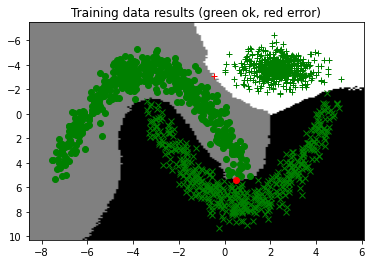

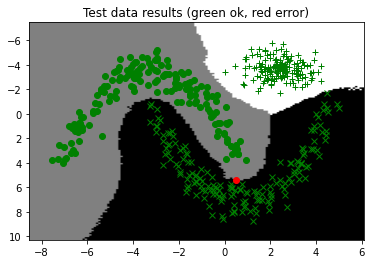

In [179]:
# Plot classifications
# Note: You should not have to modify this code

if dataSetNr < 4:
    plotResultDots(XTrain, LTrain, LPredTrain, XTest, LTest, LPredTest, 'kNN', [], k)
else:
    plotResultsOCR(XTest, LTest, LPredTest)